In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/gdrive/My Drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/My Drive/Colab Notebooks/S13/YoloV3'


/content/gdrive/My Drive/Colab Notebooks/S13/YoloV3


In [3]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [0]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave


Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

2020-04-24 06:46:58.145058: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:09<00:00,  2.22it/s]
Caching images (0.0GB): 100% 20/20 [00:12<00:00,  1.55it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 689.65it/s]
C

In [5]:
!python train.py --data data/customdata/custom.data --batch 15 --cache --cfg cfg/yolov3-custom.cfg --epochs 150 --nosave

Namespace(accumulate=4, adam=False, batch_size=15, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=150, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-26 14:57:20.503277: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (492 found, 3 missing, 5 empty, 0 duplicate, for 500 images): 100% 500/500 [00:00<00:00, 1095.28it/s]
Caching images (0.0GB):   9% 43/500 [00:01<00:11, 40.08it/s]libpng warning: iCCP: known incorrect sRGB profile
Caching images (0.3GB): 100% 500/500 [0

In [22]:
!python detect.py  --conf-thres 0.5 --output out_out


Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.5, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/500 data/customdata/images/Fish1.jpg: 512x512 2 fishs, Done. (0.020s)
image 2/500 data/customdata/images/Fish10.jpg: 384x512 1 fishs, Done. (0.018s)
image 3/500 data/customdata/images/Fish100.jpg: 256x512 Done. (0.016s)
image 4/500 data/customdata/images/Fish101.jpg: 384x512 1 fishs, Done. (0.019s)
image 5/500 data/customdata/images/Fish102.jpg: 448x512 1 fishs, Done. (0.020s)
image 6/500 data/customdata/images/Fish103.jpg: 384x512 1 fishs, Done. (0.018s)
image 7/500 data/customdata/images/Fish104.jpg:

In [21]:
!python detect.py --source=In_data --conf-thres 0.6 --output out_out4


Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.6, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out4', save_txt=False, source='In_data', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
video 1/1 (1/1106) In_data/30 seconds of Seahorse.mp4: 320x512 Done. (0.017s)
video 1/1 (2/1106) In_data/30 seconds of Seahorse.mp4: 320x512 Done. (0.016s)
video 1/1 (3/1106) In_data/30 seconds of Seahorse.mp4: 320x512 Done. (0.016s)
video 1/1 (4/1106) In_data/30 seconds of Seahorse.mp4: 320x512 Done. (0.016s)
video 1/1 (5/1106) In_data/30 seconds of Seahorse.mp4: 320x512 Done. (0.015s)
video 1/1 (6/1106) In_data/30 seconds of Seahorse.mp4: 320x512 Done. (0.015s)
video 1/1 (7/1106) In_data/30 seconds of Seahorse.mp4: 320x51

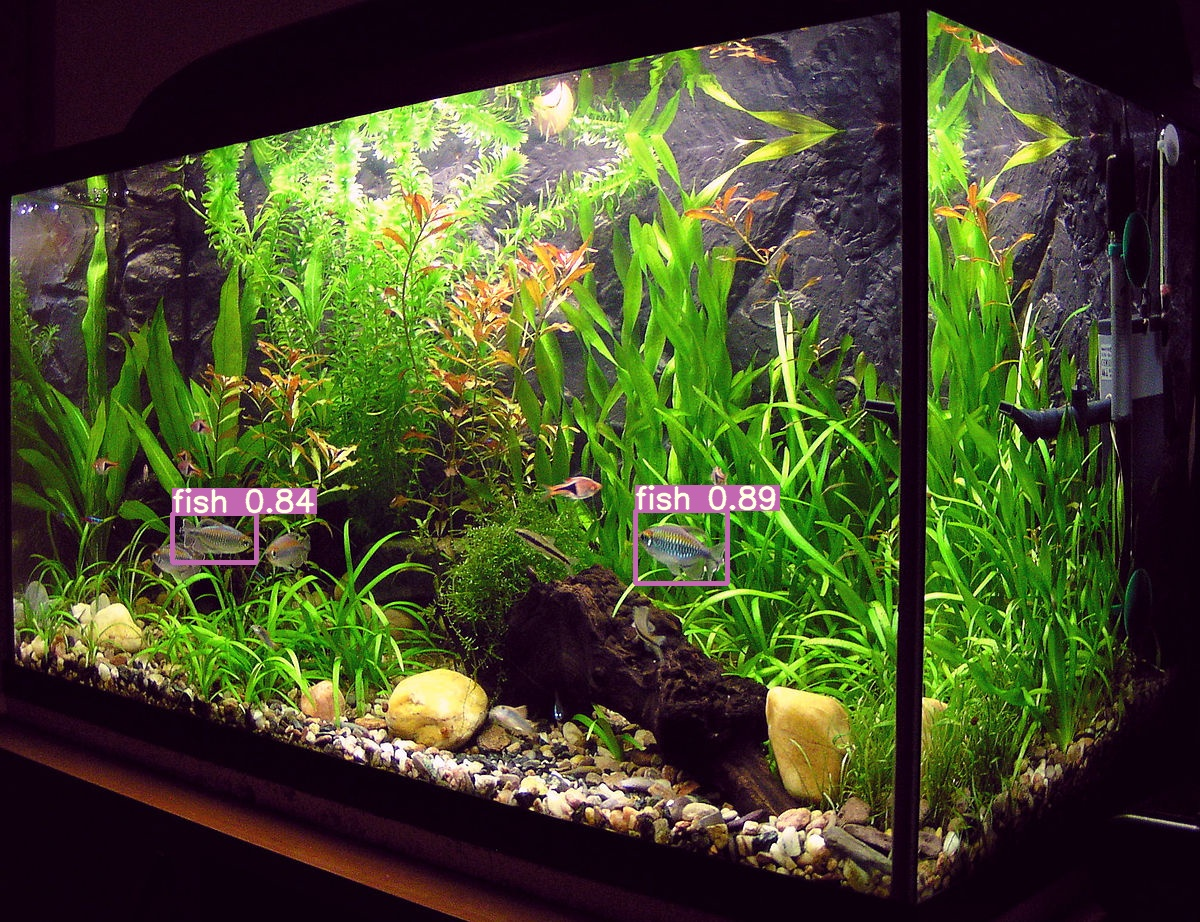

In [10]:
Image(filename='out_out/Fish3.jpg', width=600)

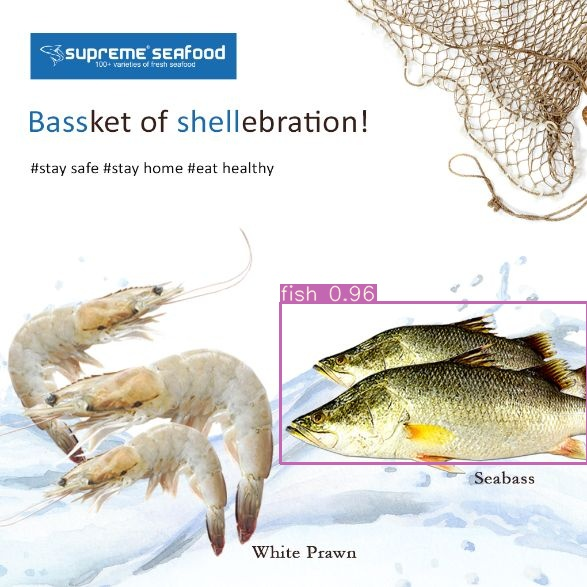

In [16]:
Image(filename='out_out/Fish17.jpg', width=600)